# Prova 1 de Física Computacional
Aluno: Wagner Martins de Lima Filho

In [132]:
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

### a) Transforme a unidade das posições de Km para AU (1 AU = 149598000 Km)

In [133]:
df = np.loadtxt("./marsexpress.dat")
t = df[:,0]
x = df[:,1]
y = df[:,2]

AU = 149598000

x /= AU
y /= AU

print(x)
print(y)

[-0.18830348 -0.1873968  -0.18648999 ...  1.00020361  0.99978596
  0.99936904]
[-0.997312   -0.99749823 -0.99768373 ...  1.07090783  1.07139013
  1.07187148]


### b) A partir dos dados, faça um gráfico da trajetória y _versus_ x.

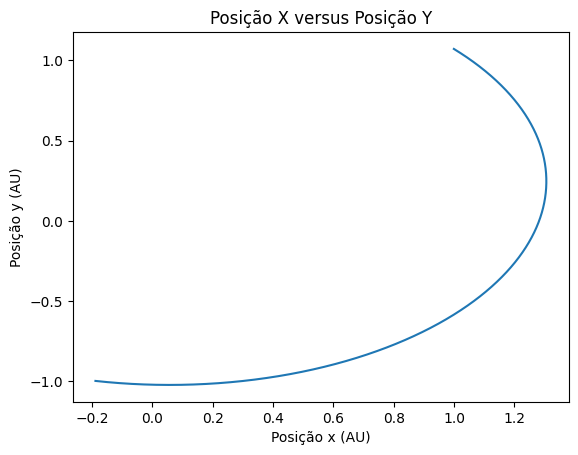

In [134]:
plt.plot(x,y)
plt.title("Posição X versus Posição Y")
plt.xlabel("Posição x (AU)")
plt.ylabel("Posição y (AU)")
plt.show()

### c) Calcule e faça o gráfico da velocidade da sonda em função do tempo. Lembre-se que $v=\sqrt{v_x^2+v_y^2}$

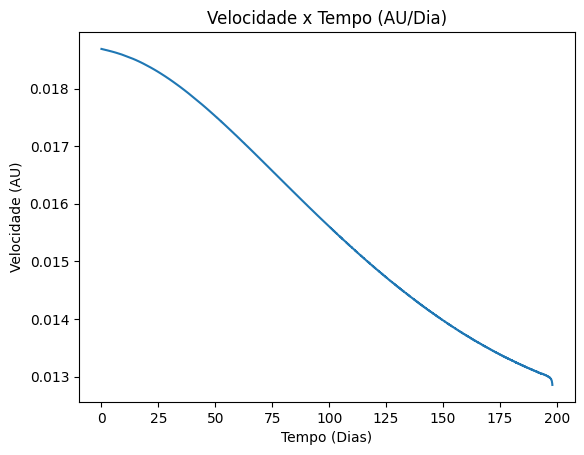

In [135]:
vx = (x[1:]-x[:-1])/(t[1:]-t[:-1])
vy = (y[1:]-y[:-1])/(t[1:]-t[:-1])

v = np.sqrt(vx**2+vy**2)

plt.plot(t[:-1], v)
plt.title("Velocidade x Tempo (AU/Dia)")
plt.xlabel("Tempo (Dias)")
plt.ylabel("Velocidade (AU)")
plt.show()

### d) Qual a velocidade da sonda ao chegar em marte?

In [136]:
# O ultimo instante de tempo, quando a sonda pousa em marte
print(v[-1]*(AU/24), "Km/h")

80140.98611448827 Km/h


## Problema 2

O período de um pêndulo simples, onde vale a aproximação de pequenas oscilações é dado por:
* T: Período
* L: Comprimento do Pêndulo
$$T = 2\pi \sqrt{\frac{L}{g}}$$

Para o caso de grandes amplitudes, onde **não** vale a aproximação harmônica, o período é dado pela integral:
* $\tau$: Período
* $\theta$: Ângulo
* $\theta_0$: Amplitude (deslocamento inicial)
* L: Comprimento do Pêndulo
$$\tau = 2\sqrt{\frac{L}{g}}\int_0^{\theta_0}{[sen^2(\theta_0/2)-sen^2(\theta/2)]^{-\frac{1}{2}}}d\theta$$

### a) Escreva uma função para resolver a integral acima pelo método de Simpson, com $\theta_0$ sendo o parâmetro da função.

In [137]:
def simpson_integral(f, a, b, n):
    h = (b-a)/n
    k = np.arange(1,(n/2)+1)
    return (1/3)*h*( f(a) + f(b) + 4*np.sum(f(a+(2*k-1)*h)) + 2*np.sum(f(a+2*(k[:-1])*h)) )

In [138]:
def periodo(theta0):
    def f(theta):
        return np.where(theta0 == theta, 0, 1/np.sqrt(np.power(np.sin(theta0/2),2)-np.power(np.sin(theta/2),2)))
    return 2*simpson_integral(f, 0, theta0, 1000)

### b) Considerando $\sqrt{\frac{L}{g}}=1$, utilize a função para calcular o $\tau$ para valores de $\theta_0$ entre $0\degree$ e $80\degree$ (não esqueça de transformar os ângulos para radianos). Faça então o gráfico $\tau$ em função de $\theta_0$. Na mesma figura, faça também o gráfico de T (Equação 1) em função de $\theta_0$ (utilize a linha pontilhada).

/tmp/ipykernel_25932/2116426535.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta0 == theta, 0, 1/np.sqrt(np.power(np.sin(theta0/2),2)-np.power(np.sin(theta/2),2)))


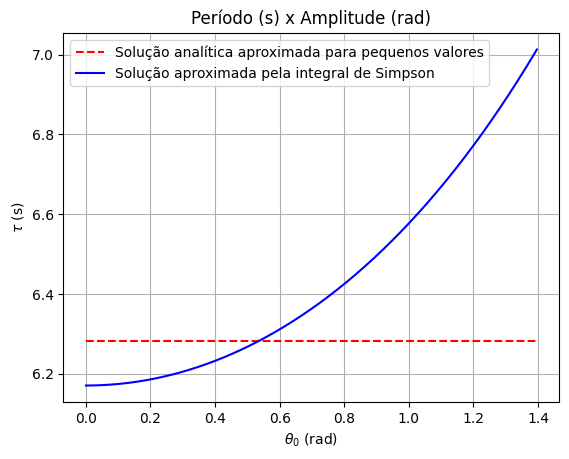

In [139]:
# Valores para Theta0
vtheta = np.linspace(0.01,80,1000)
vtheta = np.radians(vtheta)

# Eq. 1 constante 2pi
const = 2*np.pi*np.ones_like(vtheta)

# Eq. 2 periodo tau
vtau = np.array([periodo(i) for i in vtheta])

plt.plot(vtheta,const, 'r--')
plt.plot(vtheta,vtau, 'b')
plt.title('Período (s) x Amplitude (rad)')
plt.legend(['Solução analítica aproximada para pequenos valores','Solução aproximada pela integral de Simpson'])
plt.xlabel(r'$\theta_0$ (rad)')
plt.ylabel(r'$\tau$ (s)')
plt.grid()
plt.show()

### c) Com base no seu gráfico, responda: para qual valor máximo de $\theta_0$, podemos considerar uma aproximção harmônica válida?

Pensando na solução analítica que rege sobre o intervalo de 0 a 1. Pode-se encontrar valores satisfatórios ate o ponto $\theta_0=0.6$.

Por exemplo, alguns valores abaixo:

In [140]:
eq1 = 2*np.pi
print(f"Eq. 1 (0.25): {eq1}\nEq. 2 (0.25): {periodo(0.25)}\n")
print(f"Eq. 1 (0.5): {eq1}\nEq. 2 (0.5): {periodo(0.5)}\n")
print(f"Eq. 1 (0.6): {eq1}\nEq. 2 (0.5): {periodo(0.6)}\n")
print(f"Eq. 1 (0.75): {eq1}\nEq. 2 (0.5): {periodo(0.75)}\n")
print(f"Eq. 1 (1): {eq1}\nEq. 2 (1): {periodo(1)}")

Eq. 1 (0.25): 6.283185307179586
Eq. 2 (0.25): 6.194642839328561

Eq. 1 (0.5): 6.283185307179586
Eq. 2 (0.5): 6.267814142222223

Eq. 1 (0.6): 6.283185307179586
Eq. 2 (0.5): 6.311486882404697

Eq. 1 (0.75): 6.283185307179586
Eq. 2 (0.5): 6.393375373623186

Eq. 1 (1): 6.283185307179586
Eq. 2 (1): 6.577243155802275


/tmp/ipykernel_25932/2116426535.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta0 == theta, 0, 1/np.sqrt(np.power(np.sin(theta0/2),2)-np.power(np.sin(theta/2),2)))


No entanto quando os valores são superiores, a diferença se torna maior. O que pode ser verificado com o comando abaixo:

In [141]:
print(f"Eq. 1 (1.5): {eq1}\nEq. 2 (1.5): {periodo(1.5)}")

Eq. 1 (1.5): 6.283185307179586
Eq. 2 (1.5): 7.162805631464244


/tmp/ipykernel_25932/2116426535.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return np.where(theta0 == theta, 0, 1/np.sqrt(np.power(np.sin(theta0/2),2)-np.power(np.sin(theta/2),2)))


## Problema 3

### O movimento de um pêndulo simples é descrito pela EDO abaixo:
$$\frac{d^2\theta}{dt^2}+\omega_0^2sen(\theta)=0$$

### a) Resolva numericamente essa EDO pelo método RK4, entre $t=0$ e $t=20$ e para duas condições iniciais: $\theta_0=10\degree$ e $\theta_0=60\degree$, ambos com velocidades iniciais iguais a zero (não esqueça de transformar graus para radianos). Numa mesma figura, faça o gráfico da solução $\theta(t)$ em função do tempo para os dois casos. Considere $\omega_0=0.7s^{-1}$.

$$\because\ \frac{d^2\theta}{dt^2}+\omega_0^2sen(\theta)=0 \therefore\ \frac{d^2\theta}{dt^2}=-\omega_0^2sen(\theta)$$
$$\therefore\ \begin{cases}
    \frac{d\theta}{dt}=\omega \\ \\
    \frac{d\omega}{dt}=-\omega_0^2sen(\theta) \\
\end{cases}$$

Obs:
* $\theta$: Ângulo
* $\omega_0$: Amplitude
* $\omega$: Velocidade angular $\left(\frac{d\theta}{dt}\right)$

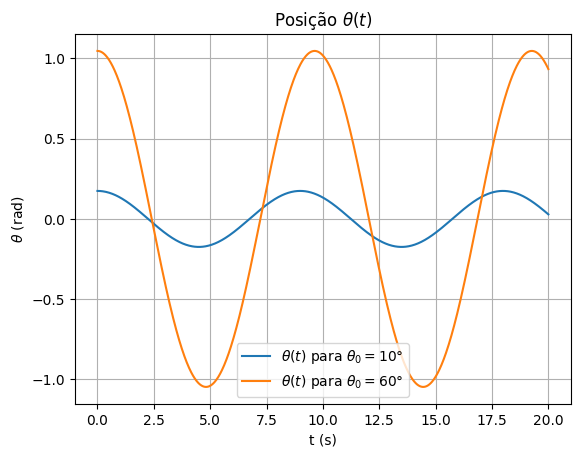

In [142]:
def metRK4(f, r0, ti, tf, n):
    r=r0
    h = (ti+tf)/n
    xpoints = []
    ypoints = []
    tpoints = np.arange(ti,tf+h,h)
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = h*f(r,t)
        k2 = h*f(r+k1/2, t+h/2)
        k3 = h*f(r+k2/2, t+h/2)
        k4 = h*f(r+k3, t+h)
        r += (1/6)*(k1+2*k2+2*k3+k4)
    return xpoints, ypoints, tpoints

def f(r,t):
    omega = 0.7

    theta,dtheta = r
    ftheta = dtheta
    dtheta = -(omega**2)*np.sin(theta)
    return np.array([ftheta,dtheta])

theta01 = np.deg2rad(10)
theta02 = np.deg2rad(60)
v0 = 0.

r01 = np.array([theta01,v0])
x1, y1, t1 = metRK4(f, r01, 0, 20, 1000)

plt.plot(t1, x1)

r02 = np.array([theta02,v0])
x2, y2, t2 = metRK4(f, r02, 0, 20, 1000)

plt.plot(t2, x2)
plt.title(r'Posição $\theta(t)$')
plt.xlabel(r't (s)')
plt.ylabel(r'$\theta$ (rad)')
plt.legend([r'$\theta(t)$ para $\theta_0=10\degree$',r'$\theta(t)$ para $\theta_0=60\degree$'])
plt.grid()
plt.show()

### b) A energia total do pêndulo, que é conservada nesse sistema, pode ser escrita como:
$$E=\frac{1}{2}mL^2\left(\frac{d\theta}{dt}\right)^2+mgL(1-cos(\theta))$$
onde $L=\frac{g}{\omega^2}$, $g$ é a aceleração da gravidade e $m=1kg$. Para o caso $\theta_0=60\degree$, faça o gráfico de $E$ em função do tempo. O que se pode concluir do resultado?

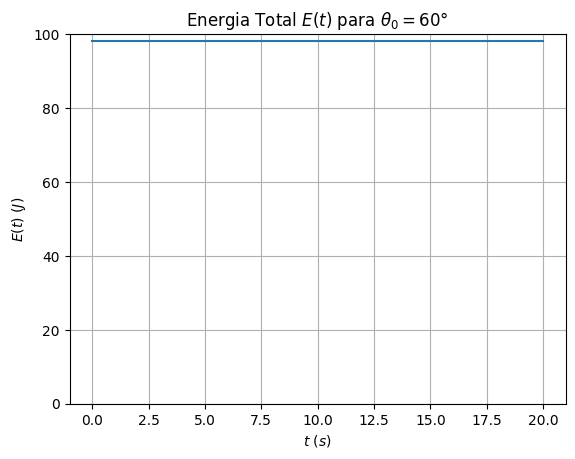

In [143]:
def energia(theta, dtheta):
    omega = 0.7
    g = 9.81
    L = g/(np.power(omega,2))
    m = 1
    return 0.5*m*(L**2)*(np.power(dtheta,2))+m*g*L*(1-np.cos(theta))

# Basicamente, a energia é calculada tomando os vetores theta e dtheta (x2,y2: x2 para theta partindo de theta inicial 60°, y2 para dtheta partindo de theta inicial 60°) calculados no item anterior. Daí pode-se inferir o restante da equação.
E2 = energia(x2,y2)

plt.plot(t2,E2)
plt.title(r"Energia Total $E(t)$ para $\theta_0=60\degree$")
plt.xlabel(r"$t\ (s)$")
plt.ylabel(r"$E(t)\ (J)$")
plt.yticks(range(0,120,20))
plt.grid()
plt.show()

Conclusão: Como a amplitude se mantém durante todo o movimento, pois não há forças externas ao sistema, visto no item (a), pode-se inferir que a energia será constante, o quê é comprovado quando olhamos o gráfico na escala correta